In [48]:
%logstop
%logstart -rtq ~/.logs/DS_Basic_DS_Modules.py append
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

In [3]:
import expectexception

# Basic data tools: NumPy, Matplotlib, Pandas

Python is a powerful and flexible programming language, but it doesn't have built-in tools for mathematical analysis or data visualization. For most data analysis we will rely on some helpful libraries. We'll explore three libraries that are very common for data analysis and visualization.

## NumPy

First among these is NumPy. The main NumPy features are three-fold: its mathematical functions (e.g. `sin`, `log`, `floor`), its `random` submodule (useful for random sampling), and the NumPy `ndarray` object.

A NumPy array is similar to a mathematical n-dimensional matrix. For example, 

$$\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{d1} & x_{d2} & x_{d3} & \dots  & x_{dn}
\end{bmatrix}$$

A NumPy array could be 1-dimensional (e.g. [1, 5, 20, 34, ...]), 2-dimensional (as above), or many dimensions. It's important to note that all the rows and columns of the 2-dimensional array are the same length. That will be true for all dimensions of arrays.

Let's contrast this with lists.

In [6]:
# to access NumPy, we have to import it
import numpy as np

In [5]:
list_of_lists = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
print(list_of_lists)

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]


In [6]:
an_array = np.array(list_of_lists)
print(an_array)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [7]:
non_rectangular = [[1, 2], [3, 4, 5], [6, 7, 8, 9]]
print(non_rectangular)

[[1, 2], [3, 4, 5], [6, 7, 8, 9]]


In [8]:
non_rectangular_array = np.array(non_rectangular)
print(non_rectangular_array)

[list([1, 2]) list([3, 4, 5]) list([6, 7, 8, 9])]


Why did these print differently? Let's investigate their _shape_ and _data type_ (`dtype`).

In [9]:
print(an_array.shape, an_array.dtype)
print(non_rectangular_array.shape, non_rectangular_array.dtype)

(3, 3) int64
(3,) object


The first case, `an_array`, is a 2-dimensional 3x3 array (of integers). In contrast, `non_rectangular_array` is a 1-dimensional length 3 array (of _objects_, namely `list` objects).

We can also create a variety of arrays with NumPy's convenience functions.

In [10]:
np.linspace(1, 10, 10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [11]:
np.arange(1, 10, 1)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
np.logspace(1, 10, 10)

array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10])

In [13]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
np.zeros((3, 2, 3))

array([[[0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.]]])

In [15]:
np.ones((3, 4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [16]:
np.diag([1,2,3,4])

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [17]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

We can also convert the `dtype` of an array after creation.

In [18]:
print(np.logspace(1, 10, 10).dtype)
print(np.logspace(1, 10, 10).astype(int).dtype)

float64
int64


In [19]:
np.array([False, True]).astype(int)

array([0, 1])

In [20]:
np.array([1, 0, 1, 0, 0]).astype(bool)

array([ True, False,  True, False, False])

Why does any of this matter?

Arrays are often more efficient in terms of code as well as computational resources for certain calculations. Computationally this efficiency comes from the fact that we pre-allocate a contiguous block of memory for the results of our computation.

To explore the advantages in code, let's try to do some math on these numbers.

First let's simply calculate the sum of all the numbers and look at the differences in the necessary code for `list_of_lists`, `an_array`, and `non_rectangular_array`.

In [21]:
list_of_lists

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [22]:
[sum(inner_list) for inner_list in list_of_lists]

[6, 15, 24]

In [23]:
an_array

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [24]:
an_array.sum(axis=1)

array([ 6, 15, 24])

In [25]:
print(sum([sum(inner_list) for inner_list in list_of_lists]))
print(an_array.sum())

45
45


In [26]:
%%timeit
sum([sum(inner_list) for inner_list in list_of_lists])

845 ns ± 187 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [27]:
%%timeit
sum(an_array)

3.46 µs ± 99.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Summing the numbers in an array is much easier than for a list of lists. We don't have to dig into a hierarchy of lists, we just use the `sum` method of the `ndarray`. Does this still work for `non_rectangular_array`?

In [28]:
# what happens here?
print(non_rectangular_array.sum())

[1, 2, 3, 4, 5, 6, 7, 8, 9]


Remember `non_rectangular_array` is a 1-dimensional array of `list` objects. The `sum` method tries to add them together: first list + second list + third list. Addition of lists results in _concatenation_.

In [29]:
# concatenate three lists
print([1, 2] + [3, 4, 5] + [6, 7, 8, 9])

[1, 2, 3, 4, 5, 6, 7, 8, 9]


The contrast becomes even more clear when we try to sum rows or columns individually.

In [30]:
print('Array row sums: ', an_array.sum(axis=1))
print('Array column sums: ', an_array.sum(axis=0))

Array row sums:  [ 6 15 24]
Array column sums:  [12 15 18]


In [31]:
print('List of list row sums: ', [sum(inner_list) for inner_list in list_of_lists])

def column_sum(list_of_lists):
    running_sums = [0] * len(list_of_lists[0])
    for inner_list in list_of_lists:
        for i, number in enumerate(inner_list):
            running_sums[i] += number
            
    return running_sums

print('List of list column sums: ', column_sum(list_of_lists))

List of list row sums:  [6, 15, 24]
List of list column sums:  [12, 15, 18]


Generally it is much more natural to do mathematical operations with arrays than lists.

In [32]:
a = np.array([1, 2, 3, 4, 5])
print(a + 5) # add a scalar
print(a * 5) # multiply by a scalar
print(a / 5) # divide by a scalar (note the float!)

[ 6  7  8  9 10]
[ 5 10 15 20 25]
[0.2 0.4 0.6 0.8 1. ]


In [33]:
b = a + 1
print(a + b) # add together two arrays
print(a * b) # multiply two arrays (element-wise)
print(a / b.astype(float)) # divide two arrays (element-wise)

[ 3  5  7  9 11]
[ 2  6 12 20 30]
[0.5        0.66666667 0.75       0.8        0.83333333]


In [34]:
a

array([1, 2, 3, 4, 5])

In [35]:
b

array([2, 3, 4, 5, 6])

Arrays can also be used for linear algebra, acting as vectors, matrices, tensors, etc.

In [36]:
print(np.dot(a, b)) # inner product of two arrays
print(np.outer(a, b)) # outer product of two arrays

70
[[ 2  3  4  5  6]
 [ 4  6  8 10 12]
 [ 6  9 12 15 18]
 [ 8 12 16 20 24]
 [10 15 20 25 30]]


Arrays have a lot to offer us in terms of representing and analyzing data, since we can easily apply mathematical functions to data sets or sections of data sets. Most of the time we won't run into any trouble using arrays, but it's good to be mindful of the restrictions around shape and datatype.

These restrictions around `shape` and `dtype` allow the `ndarray` objects to be much more performant compared to a general Python `list`.  There are few reasons for this, but the main two result from the typed nature of the `ndarray`, as this allows contiguous memory storage and consistent function lookup.  When a Python `list` is summed, Python needs to figure out at runtime the correct way in which to add each element of the list together.  When an `ndarray` is summed, `NumPy` already knows the type of the each element (and they are consistent), thus it can sum them without checking the correct add function for each element.

Lets see this in action by doing some basic profiling.  First we will create a list of 100000 random elements and then time the sum function.

In [37]:
time_list = [np.random.random() for _ in range(100000)]
time_arr = np.array(time_list)

In [38]:
%%timeit 
sum(time_list)

495 µs ± 5.54 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [39]:
%%timeit
np.sum(time_arr)

51.4 µs ± 771 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Universal functions

`NumPy` defines a `ufunc` which allows it to efficiently run functions over arrays.  Many of these functions are built in, such as `np.cos`, and implemented in highly performance compiled `C` code.  These functions can perform `broadcasting` which allows them to automatically handle operations between arrays of different shapes, for example two arrays with the same shape, or an array and a scalar.

### Changing Shape

Often we will want to take arrays that are one shape and transform them to a different shape more amenable to a specific operation.

In [40]:
mat = np.random.rand(20, 10)

In [41]:
mat.reshape(40, 5).shape

(40, 5)

In [42]:
%%expect_exception ValueError

mat.reshape(30, 5).shape

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-42-33480627628d> in <module>()
      1 
----> 2 mat.reshape(30, 5).shape

ValueError: cannot reshape array of size 200 into shape (30,5)


In [43]:
mat.ravel(). shape

(200,)

In [44]:
mat.transpose().shape

(10, 20)

### Combining arrays

In [45]:
print(a)
print(b)

[1 2 3 4 5]
[2 3 4 5 6]


In [46]:
np.hstack((a, b))

array([1, 2, 3, 4, 5, 2, 3, 4, 5, 6])

In [47]:
np.vstack((a, b))

array([[1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6]])

In [48]:
np.dstack((a, b))

array([[[1, 2],
        [2, 3],
        [3, 4],
        [4, 5],
        [5, 6]]])

### Basic data aggregation

Let's explore some more examples of using arrays, this time using NumPy's `random` submodule to create some "fake data". Simulating data is useful for testing and prototyping new techniques or code, and some algorithms even require random input.

In [49]:
np.random.seed(42)
jan_coffee_sales = np.random.randint(25, 200, size=(4, 7))
print(jan_coffee_sales)

[[127 117  39 131  96  45 127]
 [146  99 112 141 124 128 176]
 [155 174  77  26 112 182  62]
 [154  45 185  82  46 113  73]]


In [50]:
# mean sales
print('Mean coffees sold per day in January: %d' % jan_coffee_sales.mean())

Mean coffees sold per day in January: 110


In [51]:
# mean sales for Monday
print('Mean coffees sold on Monday in January: %d' % jan_coffee_sales[:, 1].mean())

Mean coffees sold on Monday in January: 108


In [52]:
jan_coffee_sales.max()

185

In [53]:
jan_coffee_sales_list = jan_coffee_sales.ravel().tolist()

In [54]:
jan_coffee_sales_list.index(max(jan_coffee_sales_list))

23

In [55]:
jan_coffee_sales.argmax()+1

24

In [56]:
# day with most sales
# remember we count dates from 1, not 0!
print('Day with highest sales was January %d' % (jan_coffee_sales.argmax() + 1))

Day with highest sales was January 24


In [57]:
# is there a weekly periodicity?
from fractions import Fraction

normalized_sales = (jan_coffee_sales - jan_coffee_sales.mean()) / abs(jan_coffee_sales - jan_coffee_sales.mean()).max()
frequencies = [Fraction.from_float(f).limit_denominator() for f in np.fft.fftfreq(normalized_sales.size)]
power = np.abs(np.fft.fft(normalized_sales.ravel()))**2
list(zip(frequencies, power))[:len(power) // 2]

[(Fraction(0, 1), 4.930380657631324e-32),
 (Fraction(1, 28), 11.81850804066758),
 (Fraction(1, 14), 3.0624177128282777),
 (Fraction(3, 28), 3.6145035763808595),
 (Fraction(1, 7), 8.992489334676053),
 (Fraction(5, 28), 3.689054592513946),
 (Fraction(3, 14), 8.363267066546033),
 (Fraction(1, 4), 16.615944819859244),
 (Fraction(2, 7), 0.6736105397207648),
 (Fraction(9, 28), 6.846412421396466),
 (Fraction(5, 14), 14.279717692527932),
 (Fraction(11, 28), 17.951272090034657),
 (Fraction(3, 7), 4.608890497088778),
 (Fraction(13, 28), 6.579601542582696)]

In [58]:
np.array([n for n in np.random.randint(1, 10, 100) if n % 2==0])

array([4, 2, 4, 2, 2, 4, 8, 4, 2, 8, 4, 2, 6, 6, 4, 6, 2, 2, 4, 8, 8, 2,
       8, 8, 8, 8, 8, 8, 2, 8, 8, 6, 4, 4, 4, 6, 2, 6])

In [59]:
rand_array = np.array(np.random.randint(1, 10, 100))
rand_array[rand_array % 2 ==0]

array([4, 4, 6, 8, 8, 6, 8, 4, 4, 2, 8, 2, 2, 6, 2, 6, 4, 8, 6, 8, 4, 2,
       6, 6, 6, 4, 4, 4, 4, 8, 2, 8, 2, 4, 2, 4, 8, 6, 8])

In [60]:
rand_array % 2==0

array([ True, False, False, False, False, False, False, False,  True,
       False, False, False,  True,  True, False, False, False, False,
        True,  True,  True, False,  True, False, False,  True, False,
        True, False, False, False, False,  True, False, False,  True,
        True,  True, False, False, False, False, False,  True, False,
        True, False,  True, False,  True, False,  True,  True, False,
        True,  True,  True,  True, False, False,  True, False,  True,
        True, False, False, False,  True, False,  True, False, False,
        True, False,  True,  True, False, False, False,  True, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True])

In [61]:
rand_array[[3, 6, 10, 11]]

array([7, 9, 3, 7])

Some of the functions we used above do not exist in standard Python and are provided to us by NumPy. Additionally we see that we can use the shape of an array to help us compute statistics on a subset of our data (e.g. mean number of coffees sold on Mondays). But one of the most powerful things we can do to explore data is to simply visualize it.

## Matplotlib

Matplotlib is the most popular Python plotting library. It allows us to visualize data quickly by providing a variety of types of graphs (e.g. bar, scatter, line, etc.). It also provides useful tools for arranging multiple images or image components within a figure, enabling us to build up more complex visualizations as we need to.

Let's visualize some data! In the next cells, we'll generate some data. For now we'll be focusing on how the graphs are produced rather than how the data is made.

In [8]:
import matplotlib.pyplot as plt

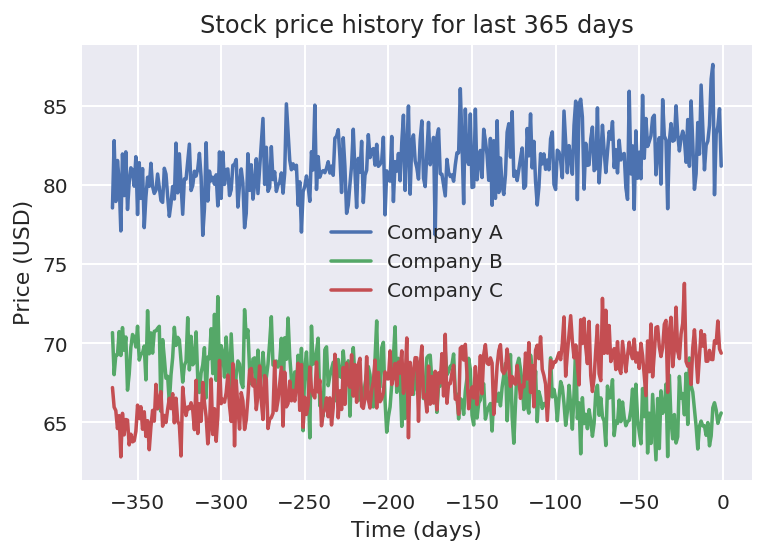

In [9]:
def gen_stock_price(days, initial_price):
    # stock price grows or shrinks linearly
    # not exceeding 10% per year (heuristic)
    trend = initial_price * (np.arange(days) * .1 / 365 * np.random.rand() * np.random.choice([1, -1]) + 1)
    # noise will be about 2%
    noise = .02 * np.random.randn(len(trend)) * trend
    return trend + noise

days = 365
initial_prices = [80, 70, 65]
for price in initial_prices:
    plt.plot(np.arange(-days, 0), gen_stock_price(days, price))
plt.title('Stock price history for last %d days' % days)
plt.xlabel('Time (days)')
plt.ylabel('Price (USD)')
plt.legend(['Company A', 'Company B', 'Company C'])

In [67]:
trend = np.arange(365)*.1/365*np.random.rand() * np.random.choice([1, -1])+1

In [69]:
noise = 0.02 * np.random.randn(len(trend))*trend
noise
trend + noise

array([0.99611497, 0.99604068, 0.95475814, 1.01645607, 1.00357059,
       1.03676384, 0.99950523, 1.01250299, 1.01798764, 0.96651985,
       1.0540824 , 0.993196  , 1.01190479, 1.0149992 , 0.98599244,
       1.03952384, 1.00799156, 0.99854295, 1.00576905, 1.01849005,
       1.00353958, 1.02118918, 0.96983458, 0.98880477, 0.9610409 ,
       1.04425968, 1.04417102, 1.01707445, 0.98430548, 1.05284607,
       0.99283581, 1.00086439, 1.00852427, 1.01456261, 1.01859772,
       1.01957385, 1.00307345, 1.01959152, 1.00250546, 1.0181408 ,
       1.01665773, 1.02217282, 1.01982646, 0.99823237, 1.01655165,
       1.02064222, 0.98162283, 1.00228513, 1.02023423, 1.04260526,
       1.0249423 , 1.04422131, 1.00060323, 1.01385355, 1.02523111,
       0.96218578, 1.03980132, 0.9718996 , 1.02976735, 1.02367384,
       0.96271038, 0.96388963, 1.03924574, 1.03501587, 0.99282867,
       0.99297137, 1.02133009, 1.01087399, 1.03262401, 1.02116558,
       1.04365898, 1.03142671, 1.02655034, 1.00500067, 1.00368

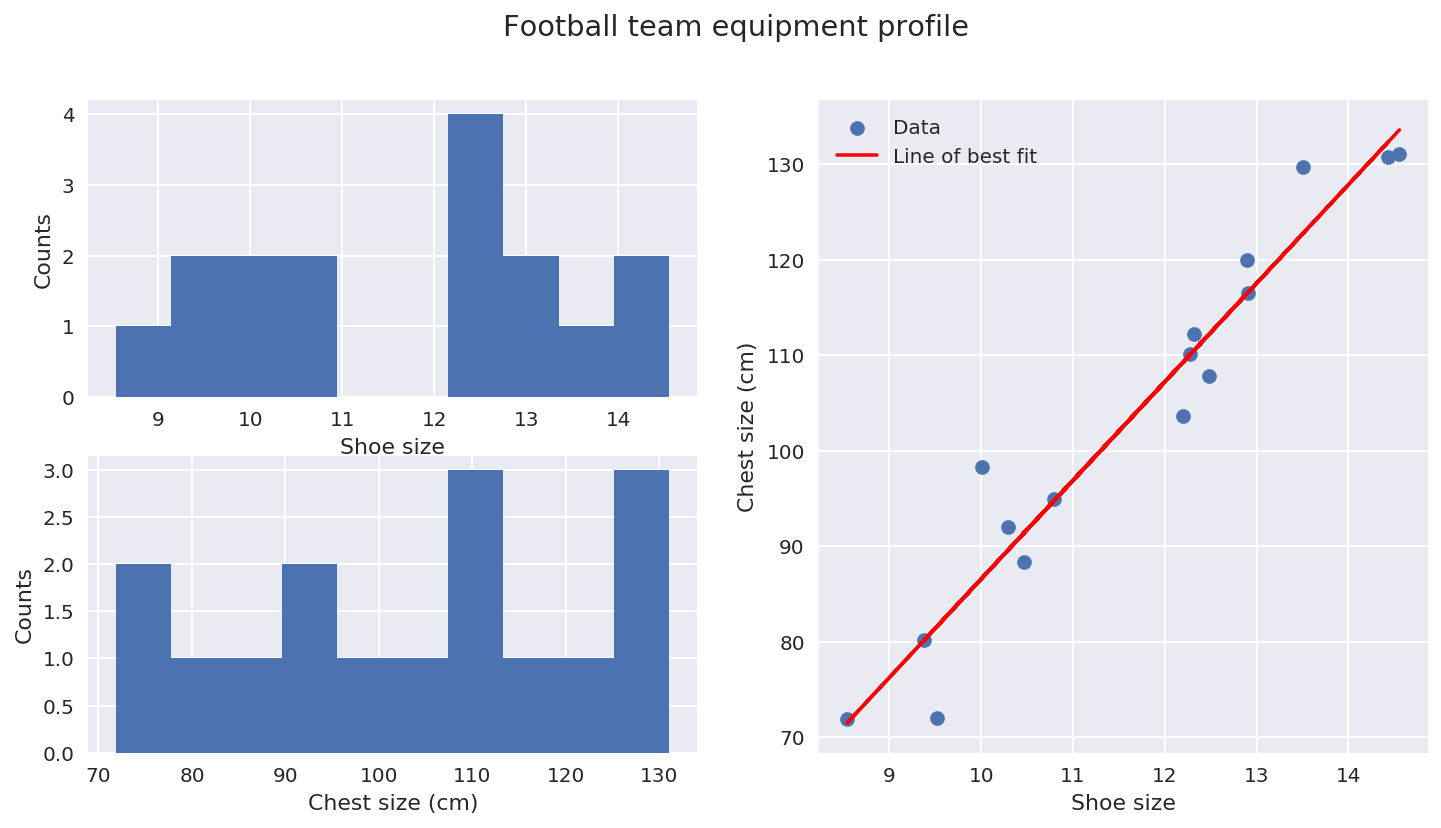

In [10]:
from scipy.stats import linregress

def gen_football_team(n_players, mean_shoe, mean_jersey):
    shoe_sizes = np.random.normal(size=n_players, loc=mean_shoe, scale=.15 * mean_shoe)
    jersey_sizes = mean_jersey / mean_shoe * shoe_sizes + np.random.normal(size=n_players, scale=.05 * mean_jersey)

    return shoe_sizes, jersey_sizes

shoes, jerseys = gen_football_team(16, 11, 100)

fig = plt.figure(figsize=(12, 6))
fig.suptitle('Football team equipment profile')

ax1 = plt.subplot(221)
ax1.hist(shoes)
ax1.set_xlabel('Shoe size')
ax1.set_ylabel('Counts')

ax2 = plt.subplot(223)
ax2.hist(jerseys)
ax2.set_xlabel('Chest size (cm)')
ax2.set_ylabel('Counts')

ax3 = plt.subplot(122)
ax3.scatter(shoes, jerseys, label='Data')
ax3.set_xlabel('Shoe size')
ax3.set_ylabel('Chest size (cm)')

fit_line = linregress(shoes, jerseys)
ax3.plot(shoes, fit_line[1] + fit_line[0] * shoes, 'r', label='Line of best fit')

handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles[::-1], labels[::-1])

Text(0, 0.5, 'Temperature (C)')

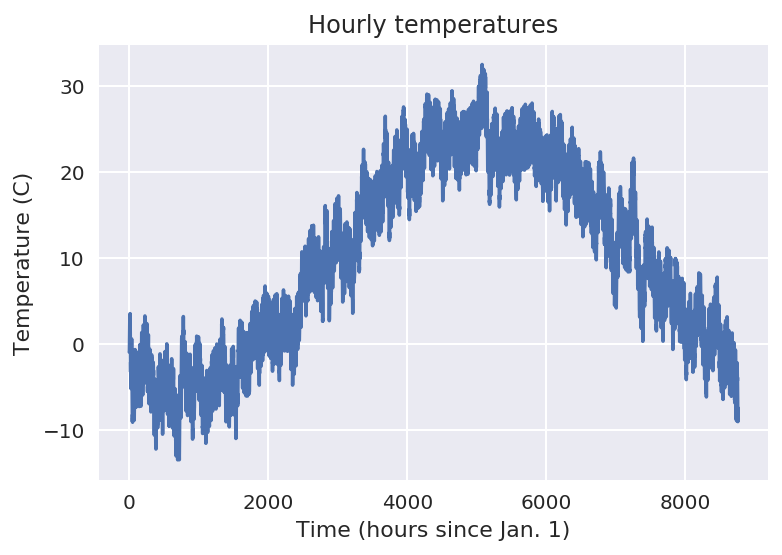

In [75]:
def gen_hourly_temps(days):
    ndays = len(days)
    seasonality = (-15 * np.cos((np.array(days) - 30) * 2.0 * np.pi / 365)).repeat(24) + 10
    solar = -3 * np.cos(np.arange(24 * ndays) * 2.0 * np.pi / 24)
    weather = np.interp(range(len(days) * 24), range(0, 24 * len(days), 24 * 2), 3 * np.random.randn(np.ceil(float(len(days)) / 2).astype(int)))
    noise = .5 * np.random.randn(24 * len(days))

    return seasonality + solar + weather + noise

days = np.arange(365)
hours = np.arange(days[0] * 24, (days[-1] + 1) * 24)
plt.plot(hours, gen_hourly_temps(days))
plt.title('Hourly temperatures')
plt.xlabel('Time (hours since Jan. 1)')
plt.ylabel('Temperature (C)')

In the examples above we've made use of the ubiquitous `plot` command, `subplot` for arranging multiple plots in one image, and `hist` for creating histograms. We've also used both the "state machine" (i.e. using a sequence of `plt.method` commands) and "object-oriented" (i.e. creating figure objects and mutating them) plotting paradigms. The Matplotlib package is very flexible and the possibilities for visualizing data are mostly limited by imagination. A great way to explore Matplotlib and other data visualization packages is by consulting their [gallery pages](https://matplotlib.org/gallery.html).

# Pandas

NumPy is useful for handling data as it lets us efficiently apply functions to whole data sets or select pieces of them. However, it can be difficult to keep track of related data that might be stored in different arrays, or the meaning of data stored in different rows or columns of the same array.

For example, in the previous section we had a 1-dimensional array for shoe sizes, and another 1-dimensional array for jersey sizes. If we wanted to look up the shoe and jersey size for a particular player, we'd have to remember his position in each array.

Alternatively, we could combine the two 1-dimensional arrays to make a 2-dimensional array with `n_players` rows and two columns (one for shoe size, one for jersey size). But once we combine the data, we now have to remember which column is shoe size and which column is jersey size.

The Pandas package introduces a very powerful tool for working with data in Python: the DataFrame. A DataFrame is a table. Each column represents a different type of data (sometimes called a **field**). The columns are named, so I could have a column called `'shoe_size'` and a column called `'jersey_size'`. I don't have to remember which column is which, because I can refer to them by name. Each row represents a different **record** or **entity** (e.g. player). I can also name the rows, so instead of remembering which row in my array corresponds with Ronaldinho, I can name the row 'Ronaldinho' and look up his shoe size and jersey size by name.

In [11]:
import pandas as pd

players = ['Ronaldinho', 'Pele', 'Lionel Messi', 'Zinedine Zidane', 'Didier Drogba', 'Ronaldo', 'Yaya Toure', 
           'Frank Rijkaard', 'Diego Maradona', 'Mohamed Aboutrika', "Samuel Eto'o", 'George Best', 'George Weah', 
           'Roberto Donadoni']
shoes, jerseys = gen_football_team(len(players), 10, 100)

df = pd.DataFrame({'shoe_size': shoes, 'jersey_size': jerseys}, index = players)

df

,shoe_size,jersey_size
Ronaldinho,10.163544,100.957208
Pele,8.413419,81.303089
Lionel Messi,10.560456,105.174287
Zinedine Zidane,9.348213,102.833473
Didier Drogba,6.905234,64.365953
Ronaldo,11.369463,119.281943
Yaya Toure,9.636273,102.233860
Frank Rijkaard,8.276954,81.037898
Diego Maradona,9.139834,103.861799
Mohamed Aboutrika,8.816598,80.147618


In [12]:
# we can also make a dataframe using zip

df = pd.DataFrame(list(zip(shoes, jerseys)), columns = ['shoe_size', 'jersey_size'], index = players)

df

,shoe_size,jersey_size
Ronaldinho,10.163544,100.957208
Pele,8.413419,81.303089
Lionel Messi,10.560456,105.174287
Zinedine Zidane,9.348213,102.833473
Didier Drogba,6.905234,64.365953
Ronaldo,11.369463,119.281943
Yaya Toure,9.636273,102.233860
Frank Rijkaard,8.276954,81.037898
Diego Maradona,9.139834,103.861799
Mohamed Aboutrika,8.816598,80.147618


The DataFrame has similarities to both a `dict` and a NumPy `ndarray`. For example, we can retrieve a column from the DataFrame by using its name, just like we would retrieve an item from a `dict` using its key.

In [15]:
type(df['shoe_size'])

pandas.core.series.Series

In [13]:
print(df['shoe_size'])

Ronaldinho           10.163544
Pele                  8.413419
Lionel Messi         10.560456
Zinedine Zidane       9.348213
Didier Drogba         6.905234
Ronaldo              11.369463
Yaya Toure            9.636273
Frank Rijkaard        8.276954
Diego Maradona        9.139834
Mohamed Aboutrika     8.816598
Samuel Eto'o          9.989065
George Best           9.857937
George Weah           9.413088
Roberto Donadoni     11.416596
Name: shoe_size, dtype: float64


And we can easily apply functions to the DataFrame, just like we would with a NumPy array.

In [16]:
print(np.log(df))

                   shoe_size  jersey_size
Ronaldinho          2.318807     4.614697
Pele                2.129828     4.398184
Lionel Messi        2.357116     4.655619
Zinedine Zidane     2.235185     4.633111
Didier Drogba       1.932280     4.164585
Ronaldo             2.430931     4.781490
Yaya Toure          2.265534     4.627263
Frank Rijkaard      2.113475     4.394917
Diego Maradona      2.212642     4.643061
Mohamed Aboutrika   2.176636     4.383870
Samuel Eto'o        2.301491     4.585352
George Best         2.288277     4.573140
George Weah         2.242101     4.489956
Roberto Donadoni    2.435068     4.734273


In [17]:
df.mean()

shoe_size       9.521905
jersey_size    95.641483
dtype: float64

We'll explore applying functions and analyzing data in a DataFrame in more depth later on. First we need to know how to retrieve, add, and remove data from a DataFrame.

We've already seen how to retrieve a column, what about retrieving a row? The most flexible syntax is to use the DataFrame's `loc` method.

In [22]:
print(df.loc['Ronaldo'])

11.369463442211737


In [25]:
print(df.loc['Ronaldo', 'shoe_size'])

11.369463442211737


In [19]:
print(df.loc[['Ronaldo', 'George Best'], 'shoe_size'])

Ronaldo        11.369463
George Best     9.857937
Name: shoe_size, dtype: float64


In [31]:
# can also select position-based slices of data
print(df.loc['Ronaldo':'George Best', 'shoe_size'])

Ronaldo              11.369463
Yaya Toure            9.636273
Frank Rijkaard        8.276954
Diego Maradona        9.139834
Mohamed Aboutrika     8.816598
Samuel Eto'o          9.989065
George Best           9.857937
Name: shoe_size, dtype: float64


In [30]:
print(df.loc['Ronaldo':'George Best'])

                   shoe_size  jersey_size
Ronaldo            11.369463   119.281943
Yaya Toure          9.636273   102.233860
Frank Rijkaard      8.276954    81.037898
Diego Maradona      9.139834   103.861799
Mohamed Aboutrika   8.816598    80.147618
Samuel Eto'o        9.989065    98.037711
George Best         9.857937    96.847722


In [32]:
# for position-based indexing, we will typically use iloc
print(df.iloc[:5])

                 shoe_size  jersey_size
Ronaldinho       10.163544   100.957208
Pele              8.413419    81.303089
Lionel Messi     10.560456   105.174287
Zinedine Zidane   9.348213   102.833473
Didier Drogba     6.905234    64.365953


In [37]:
print(df.iloc[2:4, 0])

Lionel Messi       10.560456
Zinedine Zidane     9.348213
Name: shoe_size, dtype: float64


In [38]:
print(df.iloc[4:8, :2])

                shoe_size  jersey_size
Didier Drogba    6.905234    64.365953
Ronaldo         11.369463   119.281943
Yaya Toure       9.636273   102.233860
Frank Rijkaard   8.276954    81.037898


In [39]:
# to see just the top of the DataFrame, use head
df.head()

,shoe_size,jersey_size
Ronaldinho,10.163544,100.957208
Pele,8.413419,81.303089
Lionel Messi,10.560456,105.174287
Zinedine Zidane,9.348213,102.833473
Didier Drogba,6.905234,64.365953


In [40]:
# of for the bottom use tail
df.tail()

,shoe_size,jersey_size
Mohamed Aboutrika,8.816598,80.147618
Samuel Eto'o,9.989065,98.037711
George Best,9.857937,96.847722
George Weah,9.413088,89.117492
Roberto Donadoni,11.416596,113.780712


Just as with a `dict`, we can add data to our DataFrame by simply using the same syntax as we would use to retrieve data, but matching it with an assignment.

In [41]:
# adding a new column
df['position'] = np.random.choice(['goaltender', 'defense', 'midfield', 'attack'], size=len(df))
df.head()

,shoe_size,jersey_size,position
Ronaldinho,10.163544,100.957208,defense
Pele,8.413419,81.303089,goaltender
Lionel Messi,10.560456,105.174287,attack
Zinedine Zidane,9.348213,102.833473,attack
Didier Drogba,6.905234,64.365953,goaltender


In [42]:
# adding a new row
df.loc['Dylan'] = {'jersey_size': 91, 'shoe_size': 9, 'position': 'midfield'}
df.loc['Dylan']

shoe_size             9
jersey_size          91
position       midfield
Name: Dylan, dtype: object

To delete data, we can use the DataFrame's `drop` method.

In [43]:
df.drop('Dylan')

,shoe_size,jersey_size,position
Ronaldinho,10.163544,100.957208,defense
Pele,8.413419,81.303089,goaltender
Lionel Messi,10.560456,105.174287,attack
Zinedine Zidane,9.348213,102.833473,attack
Didier Drogba,6.905234,64.365953,goaltender
Ronaldo,11.369463,119.281943,defense
Yaya Toure,9.636273,102.233860,midfield
Frank Rijkaard,8.276954,81.037898,attack
Diego Maradona,9.139834,103.861799,goaltender
Mohamed Aboutrika,8.816598,80.147618,goaltender


In [44]:
df.drop('position', axis=1)

,shoe_size,jersey_size
Ronaldinho,10.163544,100.957208
Pele,8.413419,81.303089
Lionel Messi,10.560456,105.174287
Zinedine Zidane,9.348213,102.833473
Didier Drogba,6.905234,64.365953
Ronaldo,11.369463,119.281943
Yaya Toure,9.636273,102.233860
Frank Rijkaard,8.276954,81.037898
Diego Maradona,9.139834,103.861799
Mohamed Aboutrika,8.816598,80.147618


Notice when we executed `df.drop('position', axis=1)`, there was an entry for `Dylan` even though we had just executed `df.drop('Dylan')`. We have to be careful when using `drop`; many DataFrame functions return a _copy_ of the DataFrame. In order to make the change permanent, we either need to reassign `df` to the copy returned by `df.drop()` or we have to use the keyword `inplace`.

In [45]:
df = df.drop('Dylan')
print(df)

                   shoe_size  jersey_size    position
Ronaldinho         10.163544   100.957208     defense
Pele                8.413419    81.303089  goaltender
Lionel Messi       10.560456   105.174287      attack
Zinedine Zidane     9.348213   102.833473      attack
Didier Drogba       6.905234    64.365953  goaltender
Ronaldo            11.369463   119.281943     defense
Yaya Toure          9.636273   102.233860    midfield
Frank Rijkaard      8.276954    81.037898      attack
Diego Maradona      9.139834   103.861799  goaltender
Mohamed Aboutrika   8.816598    80.147618  goaltender
Samuel Eto'o        9.989065    98.037711    midfield
George Best         9.857937    96.847722    midfield
George Weah         9.413088    89.117492     defense
Roberto Donadoni   11.416596   113.780712  goaltender


In [46]:
df.drop('position', axis=1, inplace=True)
print(df)

                   shoe_size  jersey_size
Ronaldinho         10.163544   100.957208
Pele                8.413419    81.303089
Lionel Messi       10.560456   105.174287
Zinedine Zidane     9.348213   102.833473
Didier Drogba       6.905234    64.365953
Ronaldo            11.369463   119.281943
Yaya Toure          9.636273   102.233860
Frank Rijkaard      8.276954    81.037898
Diego Maradona      9.139834   103.861799
Mohamed Aboutrika   8.816598    80.147618
Samuel Eto'o        9.989065    98.037711
George Best         9.857937    96.847722
George Weah         9.413088    89.117492
Roberto Donadoni   11.416596   113.780712


We'll explore Pandas in much more detail later in the course, since it has many powerful tools for data analysis. However, even with these tools you can already start to discover patterns in data and draw interesting conclusions.

*Copyright &copy; 2020 The Data Incubator.  All rights reserved.*